
**ML/DS Intro Task1 (Feature Engineering)**

*   Perform Standarization from scratch and by sklearn
*   Perform Normalization from scratch and by sklearn
*   Analyze how feature scaling helps in perspective , create a box plot






In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('/content/data_task1.csv')
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,NaN,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [57]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [58]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('str')

In [59]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [60]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [62]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns

In [63]:
print(numerical_columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


**Standarization from scratch**

In [64]:
standardized_df = df.copy()

for column in numerical_columns:
    mean_value = standardized_df[column].mean()
    std_value = standardized_df[column].std()
    standardized_df[column] = (standardized_df[column] - mean_value) / std_value

In [65]:
display(standardized_df.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841822,Low Fat,-0.970675,Dairy,1.747351,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910548
1,DRC01,-1.641610,Regular,-0.908058,Soft Drinks,-1.488936,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018381
2,FDN15,1.098490,Low Fat,-0.956861,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049235
3,FDX07,1.500750,Regular,-1.281683,Fruits and Vegetables,0.660011,OUT010,1998,Medium,Tier 3,Grocery Store,-0.849053
4,NCD19,-0.929373,Low Fat,-1.281683,Household,-1.399138,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695332


**Standarization by sklearn**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
data1 = df.copy()

In [68]:
scaler = StandardScaler()

In [69]:
#transform the numerical columns

data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])

In [70]:
display(data1.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841872,Low Fat,-0.970732,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.641706,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,1.098554,Low Fat,-0.956917,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,1.500838,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,1998,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.929428,Low Fat,-1.281758,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695373



**Normalization from scratch**

In [71]:
normalized_df = df.copy()

for column in numerical_columns:
  min_value = normalized_df[column].min()
  max_value = normalized_df[column].max()
  normalized_df[column] = (normalized_df[column] - min_value) / (max_value - min_value)

In [72]:
display(normalized_df.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


**Normalization from scratch**

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
data2 = df.copy()

scaler = MinMaxScaler()

In [75]:
#transform the numerical columns

data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

In [76]:
display(data2.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


**Analyzing Features**

In [77]:
import matplotlib.pyplot as plt

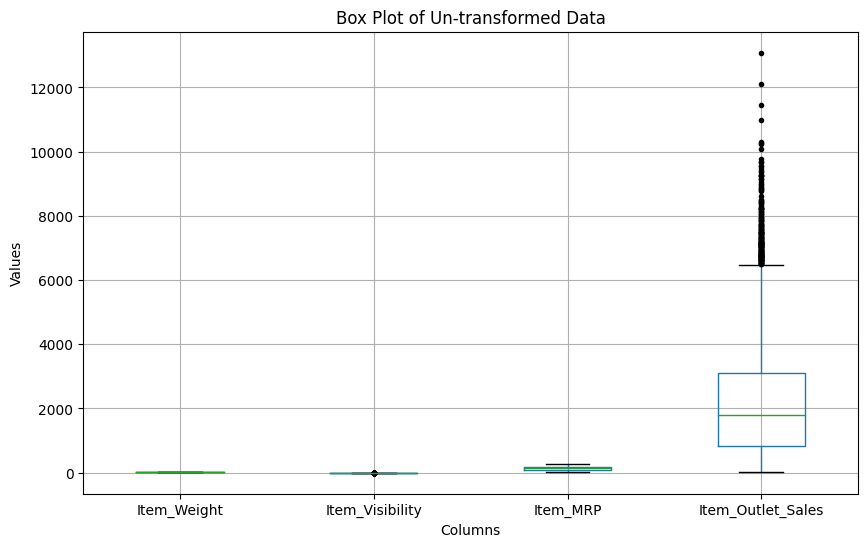

In [78]:
# Box plot for untransformed data

plt.figure(figsize=(10, 6))

df[numerical_columns].boxplot(sym = 'k.')

plt.title('Box Plot of Un-transformed Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

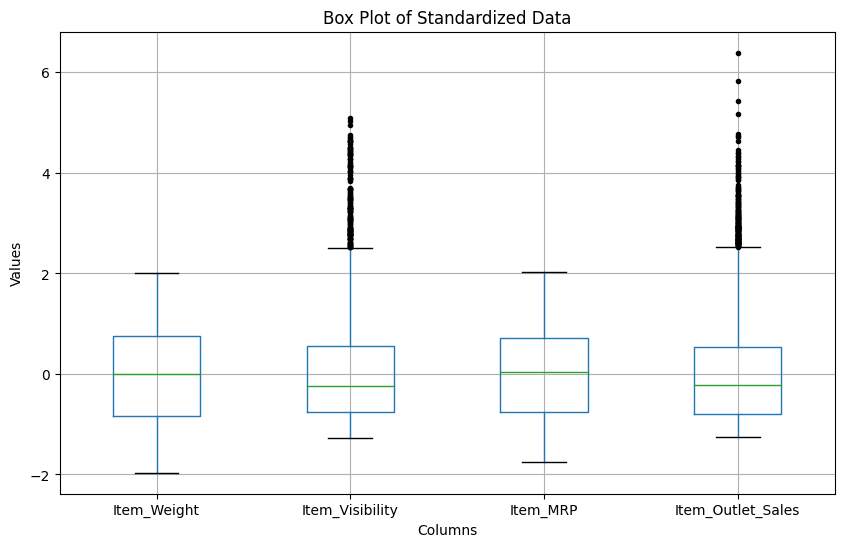

In [79]:
# Box plot for Standardized data

plt.figure(figsize=(10, 6))

data1[numerical_columns].boxplot(sym = 'k.')

plt.title('Box Plot of Standardized Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

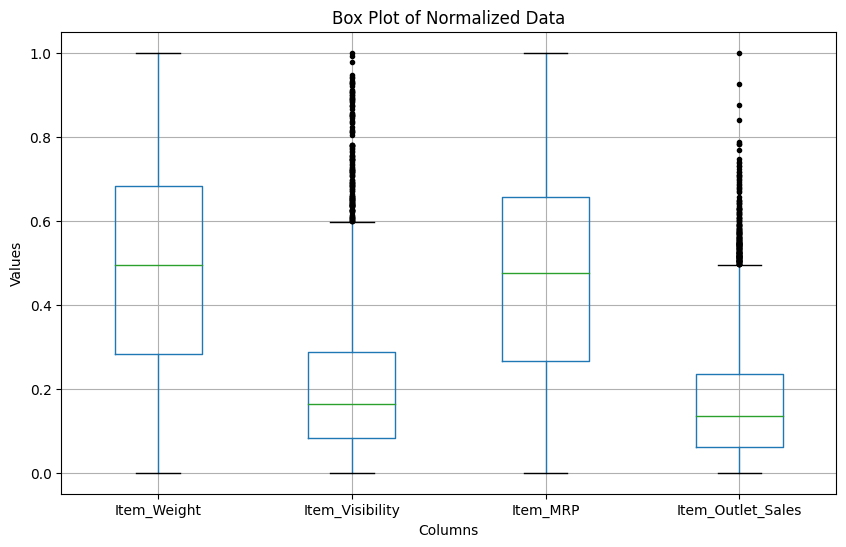

In [80]:
# Box plot for Normalized data

plt.figure(figsize=(10, 6))

data2[numerical_columns].boxplot(sym = 'k.')

plt.title('Box Plot of Normalized Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()